### BGD批量梯度下降

#### 一元一次线性回归

In [1]:
import numpy as np

import matplotlib.pyplot as plt

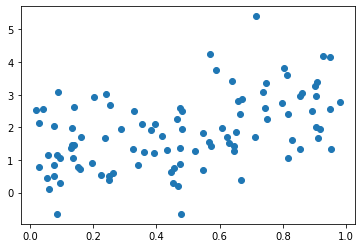

In [17]:
X = np.random.rand(100,1)

w,b = np.random.randint(1,10,size = 2)

# 增加“噪声”，更像真实数据，“加盐”
# 增加扰动！ 数据更加真实
# NumPy广播机制
y = w * X + b + np.random.randn(100,1)
plt.scatter(X,y)

# LinearRegression intercept_ == bias 一个意思：方程截距

In [18]:
# 将b作为偏置项，截距，对应的系数，理解为1
X = np.concatenate([X,np.full(shape  =(100,1),fill_value=1)],axis = 1)
X[:10]

array([[0.45383589, 1.        ],
       [0.24171204, 1.        ],
       [0.73698841, 1.        ],
       [0.02986306, 1.        ],
       [0.09405871, 1.        ],
       [0.08784082, 1.        ],
       [0.47995472, 1.        ],
       [0.47319383, 1.        ],
       [0.43242272, 1.        ],
       [0.57405063, 1.        ]])

<font size = 6 color = 'green'>$\theta^{n + 1} = \theta^{n} - \eta * X^T(X\theta -y)$</font>

In [21]:
# 循环次数
epoches = 10000

# 学习率
eta = 0.01
t0 = 5
t1 = 1000
# t 梯度下降的次数，逆时衰减，随着梯度下降次数增加，学习率，变小
def learning_rate_shedule(t):
    return t0/(t + t1) # lr = 5/1000 = 0.005

# 要求解的系数，随机数，赋值的，“瞎蒙”
theta = np.random.randn(2,1)

# 梯度下降次数
t = 0
for i in range(epoches):
    # 批量梯度下降，X矩阵，矩阵包含所有的数据
    g = X.T.dot(X.dot(theta) - y) # 根据公式计算的梯度
    eta = learning_rate_shedule(t) # 随着梯度下降次数增加，学习率下降
    theta = theta - eta * g
    t += 1
print('真实的斜率、截距是：',w,b)
print('BGD求解的斜率、截距是：',theta)

真实的斜率、截距是： 2 1
BGD求解的斜率、截距是： [[1.78289536]
 [1.01052071]]


#### 多元一次

In [24]:
X.shape
# 100表示100个方程，9表示系数

(100, 9)

In [23]:
import numpy as np

X = np.random.rand(100,8)

w = np.random.randint(1,10,size = (8,1))
b = np.random.randint(1,10,size = 1)

# 增加“噪声”，更像真实数据，“加盐”
# 增加扰动！ 数据更加真实
# NumPy广播机制
y = X.dot(w) + b + np.random.randn(100,1)

# 截距当成偏置项
X = np.concatenate([X,np.full(shape = (100,1),fill_value=1)],axis = 1)

# 循环次数
epoches = 10000

# 学习率
eta = 0.01
t0 = 5
t1 = 1000
# t 梯度下降的次数，逆时衰减，随着梯度下降次数增加，学习率，变小
def learning_rate_shedule(t):
    return t0/(t + t1) # lr = 5/1000 = 0.005

# 要求解的系数，随机数，赋值的，“瞎蒙”
theta = np.random.randn(9,1)

# 梯度下降次数
t = 0
for i in range(epoches):
    # 批量梯度下降，X矩阵，矩阵包含所有的数据
    g = X.T.dot(X.dot(theta) - y) # 根据公式计算的梯度
    eta = learning_rate_shedule(t) # 随着梯度下降次数增加，学习率下降
    theta = theta - eta * g
    t += 1
print('真实的斜率、截距是：',w,b)
print('BGD求解的斜率、截距是：',theta)

真实的斜率、截距是： [[9]
 [4]
 [7]
 [4]
 [6]
 [4]
 [7]
 [1]] [4]
BGD求解的斜率、截距是： [[8.74566929]
 [3.82541768]
 [7.36837649]
 [4.10251871]
 [6.14970335]
 [3.93188571]
 [6.74447766]
 [0.74205666]
 [4.32925198]]


### SGD随机梯度下降

#### 一元一次方程

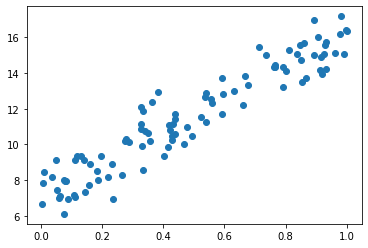

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 100样本！！！
X = np.random.rand(100,1)

w,b = np.random.randint(1,10,size = 2)

# 增加“噪声”，更像真实数据，“加盐”
# 增加扰动！ 数据更加真实
# NumPy广播机制
y = w * X + b + np.random.randn(100,1)
plt.scatter(X,y)

In [34]:
# 偏置，X也需要增加
X = np.concatenate([X,np.full_like(X,fill_value=1)],axis = 1)

In [35]:
X

array([[0.14050542, 1.        ],
       [0.28684708, 1.        ],
       [0.357433  , 1.        ],
       [0.13205579, 1.        ],
       [0.99909854, 1.        ],
       [0.8481711 , 1.        ],
       [0.5383822 , 1.        ],
       [0.41824089, 1.        ],
       [0.76588646, 1.        ],
       [0.91794555, 1.        ],
       [0.15688099, 1.        ],
       [0.6768211 , 1.        ],
       [0.3827946 , 1.        ],
       [0.21938911, 1.        ],
       [0.08966735, 1.        ],
       [0.07489956, 1.        ],
       [0.03615972, 1.        ],
       [0.63147205, 1.        ],
       [0.89343695, 1.        ],
       [0.85028399, 1.        ],
       [0.93334302, 1.        ],
       [0.00576761, 1.        ],
       [0.11108129, 1.        ],
       [0.76110346, 1.        ],
       [0.10752354, 1.        ],
       [0.71320756, 1.        ],
       [0.66180279, 1.        ],
       [0.59067267, 1.        ],
       [0.7637599 , 1.        ],
       [0.49278241, 1.        ],
       [0.

In [36]:
epoches = 100 # 循环100次

t0 = 5
t1 = 1000
# t 梯度下降的次数，逆时衰减，随着梯度下降次数增加，学习率，变小
def learning_rate_shedule(t):
    return t0/(t + t1) # lr = 5/1000 = 0.005

# 既有斜率（一个）、截距
theta = np.random.randn(2,1)

count = 0 # 表示训练次数
for t in range(epoches):
    index = np.arange(100) # 0,1,2,……，99
    np.random.shuffle(index) # 洗牌，打乱顺序
    # numpy花式索引
    X = X[index]
    y = y[index]
    for i in range(100):
        # 随机抽样！！！抽了一个样本
        X_i = X[[i]] # 两个[[]]
        y_i = y[[i]]
        
        # 根据这一个样本，进行计算梯度
        # 单个样本，依然是一个矩阵
        g = X_i.T.dot(X_i.dot(theta) - y_i)
        eta = learning_rate_shedule(count)
        count += 1
        theta -= 0.1 * g
print('真实的斜率、截距是：',w,b)
print('SGD求解的斜率、截距是：',theta)

真实的斜率、截距是： 9 7
SGD求解的斜率、截距是： [[8.90623199]
 [7.05013822]]


In [37]:
X[0]

array([0.73736993, 1.        ])

In [38]:
X[[0]]

array([[0.73736993, 1.        ]])

#### 多元一次方程

In [41]:
import numpy as np

X = np.random.rand(100,5)

w = np.random.randint(1,10,size = (5,1))
b = np.random.randint(1,10,size = 1)

# 增加“噪声”，更像真实数据，“加盐”
# 增加扰动！ 数据更加真实
# NumPy广播机制
y = X.dot(w) + b + np.random.randn(100,1)

# 截距当成偏置项
X = np.concatenate([X,np.full(shape = (100,1),fill_value=1)],axis = 1)


epoches = 1000 # 循环100次

t0 = 5
t1 = 1000
# t 梯度下降的次数，逆时衰减，随着梯度下降次数增加，学习率，变小
def learning_rate_shedule(t):
    return t0/(t + t1) # lr = 5/1000 = 0.005

# 既有斜率（5个 + 1个截距 = 6） 、截距
theta = np.random.randn(6,1)

count = 0 # 表示训练次数
for t in range(epoches):
    index = np.arange(100) # 0,1,2,……，99
    np.random.shuffle(index) # 洗牌，打乱顺序
    # numpy花式索引
    X = X[index]
    y = y[index]
    for i in range(100):
        # 随机抽样！！！抽了一个样本
        X_i = X[[i]] # 两个[[]]
        y_i = y[[i]]
        
        # 根据这一个样本，进行计算梯度
        # 单个样本，依然是一个矩阵
        g = X_i.T.dot(X_i.dot(theta) - y_i)
        eta = learning_rate_shedule(count)
        count += 1
        theta -= eta * g
print('真实的斜率、截距是：',w,b)
print('SGD求解的斜率、截距是：',theta)

真实的斜率、截距是： [[8]
 [5]
 [6]
 [2]
 [2]] [7]
SGD求解的斜率、截距是： [[6.99262565]
 [4.5037859 ]
 [5.42129591]
 [2.12250548]
 [2.26367483]
 [7.99425214]]


### MBGD小批量梯度下降

#### 一元一次方程

In [45]:
import numpy as np

# 1、创建数据集X，y
X = np.random.rand(100, 1)
w,b = np.random.randint(1,10,size = 2)
y = w * X + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X = np.c_[X, np.ones((100, 1))]

# 3、定义一个函数来调整学习率
t0, t1 = 5, 500
def learning_rate_schedule(t):
    return t0/(t+t1)

# 4、创建超参数轮次、样本数量、小批量数量
epochs = 1000
n = 100
batch_size = 16
num_batches = int(n / batch_size) # 6次，6 * 16 = 96



# 5、初始化 W0...Wn，标准正太分布创建W，截距
θ = np.random.randn(2, 1)

# 6、多次for循环实现梯度下降，最终结果收敛
for epoch in range(epochs):
    # 在双层for循环之间，每个轮次开始分批次迭代之前打乱数据索引顺序
    index = np.arange(n)
    np.random.shuffle(index)
    X = X[index]
    y = y[index]
    for i in range(num_batches): # 6
        # 一次取一批数据16个样本
        # 切片
        X_batch = X[i * batch_size : (i + 1)*batch_size]
        y_batch = y[i * batch_size : (i + 1)*batch_size]
        
        g = X_batch.T.dot(X_batch.dot(θ)-y_batch)
        
        learning_rate = learning_rate_schedule(epoch * n + i)
        
        θ = θ - learning_rate * g

print('真实斜率和截距是：',w,b)
print('梯度下降计算斜率和截距是：',θ)

真实斜率和截距是： 2 2
梯度下降计算斜率和截距是： [[1.74964199]
 [2.10556409]]


#### 多元一次方程

In [46]:
import numpy as np

# 1、创建数据集X，y
X = np.random.rand(100, 3)
w = np.random.randint(1,10,size = (3,1))
b = np.random.randint(1,10,size = 1)
y = X.dot(w) + b + np.random.randn(100, 1)

# 2、使用偏置项 X_0 = 1，更新X
X = np.c_[X, np.ones((100, 1))]

# 3、定义一个函数来调整学习率
t0, t1 = 5, 500
def learning_rate_schedule(t):
    return t0/(t+t1)

# 4、创建超参数轮次、样本数量、小批量数量
epochs = 10000
n = 100
batch_size = 16
num_batches = int(n / batch_size)

# 5、初始化 W0...Wn，标准正太分布创建W
θ = np.random.randn(4, 1)

# 6、多次for循环实现梯度下降，最终结果收敛
for epoch in range(epochs):
    # 在双层for循环之间，每个轮次开始分批次迭代之前打乱数据索引顺序
    index = np.arange(n)
    np.random.shuffle(index)
    X = X[index]
    y = y[index]
    for i in range(num_batches):
        # 一次取一批数据16个样本
        X_batch = X[i * batch_size : (i + 1)*batch_size]
        y_batch = y[i * batch_size : (i + 1)*batch_size]
        g = X_batch.T.dot(X_batch.dot(θ)-y_batch)
        learning_rate = learning_rate_schedule(epoch * n + i)
        θ = θ - learning_rate * g

print('真实斜率和截距是：',w,b)
print('梯度下降计算斜率和截距是：',θ)

真实斜率和截距是： [[2]
 [3]
 [4]] [2]
梯度下降计算斜率和截距是： [[1.78531707]
 [3.02035029]
 [3.58870901]
 [2.29199256]]
